In [2]:
import scanpy as sc
import numpy as np

In [2]:
adata = sc.read('../../../snakemake/hlca/5fold/hlca_no_vae/data/pp/hlca_embed.h5ad')
adata

AnnData object with n_obs × n_vars = 2149684 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [14]:
adata[~np.isnan(adata.obs['anatomical_region_ccf_score'])].obs['anatomical_region_ccf_score']

CGATGTAAGTTACGGG_SC10                   0.97
ATTCTACCAAGGTTCT_HD68                   0.97
P1_2_TGCTGCTAGCTCCTCT                   0.97
CTGATAGTCTTAGAGC_F01367                 0.97
D344_Brus_Dis1_CATTCGCGTGCCTGCA-1-14    0.81
                                        ... 
ACACCAACAAGACAC_GRO-03_biopsy           0.72
AGTGGGAGTTGTCTTT-1-7                    0.00
P3_4_TAAACCGGTGTCCTCT                   0.64
P3_4_GCTTGAACACGACGAA                   0.64
TCAGGATCAAGACGTG_F02526                 0.97
Name: anatomical_region_ccf_score, Length: 584944, dtype: float64

In [15]:
adata.obs['development_stage']

CGATGTAAGTTACGGG_SC10                          55-year-old human stage
cc05p_CATGCCTGTGTGCCTG_carraro_csmc                            unknown
ATTCTACCAAGGTTCT_HD68                          41-year-old human stage
D062_TGACCCTTCAAACCCA-sub_wang_sub_batch3          newborn human stage
P1_2_TGCTGCTAGCTCCTCT                          75-year-old human stage
                                                        ...           
TTGTGGATCGTTCCTG_5-PX5-sub_mould                               unknown
TCAGGATCAAGACGTG_F02526                        55-year-old human stage
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl    64-year-old human stage
022C-b_GGATGTTTCCAAGTAC_adams                                  unknown
145I-a_GTCGTAACAGTAGAGC_adams                                  unknown
Name: development_stage, Length: 2149684, dtype: category
Categories (79, object): ['1-month-old human stage', '10-year-old human stage', '11-month-old human stage', '12-month-old human stage', ..., '81-year-old human s

<Axes: >

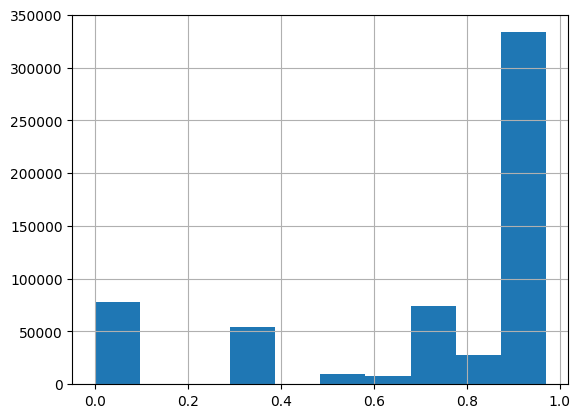

In [16]:
adata[~np.isnan(adata.obs['anatomical_region_ccf_score'])].obs['anatomical_region_ccf_score'].hist()

In [17]:
np.unique(adata[~np.isnan(adata.obs['anatomical_region_ccf_score'])].obs['anatomical_region_ccf_score'])

array([0.  , 0.36, 0.5 , 0.64, 0.72, 0.81, 0.97])

In [21]:
adata = adata[~np.isnan(adata.obs['anatomical_region_ccf_score'])].copy()
adata

AnnData object with n_obs × n_vars = 584944 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [22]:
adata.obs['region'] = 'Airway'
adata.obs.loc[adata.obs['anatomical_region_ccf_score'] == 0.0, 'region'] = 'Nose'
adata.obs.loc[adata.obs['anatomical_region_ccf_score'] == 0.97, 'region'] = 'Parenchyma'

In [23]:
np.unique(adata.obs['region'])

array(['Airway', 'Nose', 'Parenchyma'], dtype=object)

In [25]:
adata.obs[['sample', 'region']].drop_duplicates().value_counts('region')

region
Parenchyma    90
Airway        55
Nose          21
dtype: int64

In [26]:
adata.obs['region'] = adata.obs['region'].astype('category')

In [27]:
adata.write('../data/hlca_embed_regions.h5ad')

In [30]:
for i in range(5):
    print(f'split {i}')
    print('train:')
    print(adata[adata.obs[f'split{i}']=='train'].obs[['sample', 'region']].drop_duplicates().value_counts('region'))
    print('val:')
    print(adata[adata.obs[f'split{i}']!='train'].obs[['sample', 'region']].drop_duplicates().value_counts('region'))
    assert(len(np.unique(adata[adata.obs[f'split{i}']=='train'].obs['region'])) == len(np.unique(adata[adata.obs[f'split{i}']!='train'].obs['region'])))

split 0
train:
region
Parenchyma    77
Airway        43
Nose          18
dtype: int64
val:
region
Parenchyma    13
Airway        12
Nose           3
dtype: int64
split 1
train:
region
Parenchyma    71
Airway        44
Nose          17
dtype: int64
val:
region
Parenchyma    19
Airway        11
Nose           4
dtype: int64
split 2
train:
region
Parenchyma    70
Airway        43
Nose          18
dtype: int64
val:
region
Parenchyma    20
Airway        12
Nose           3
dtype: int64
split 3
train:
region
Parenchyma    66
Airway        48
Nose          18
dtype: int64
val:
region
Parenchyma    24
Airway         7
Nose           3
dtype: int64
split 4
train:
region
Parenchyma    76
Airway        42
Nose          13
dtype: int64
val:
region
Parenchyma    14
Airway        13
Nose           8
dtype: int64


In [3]:
adata = sc.read('../data/hlca_embed_regions.h5ad')
adata

AnnData object with n_obs × n_vars = 584944 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [5]:
np.unique(adata.obs['core_or_extension'])

array(['core'], dtype=object)